In [66]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [85]:
data_df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [86]:
data_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [87]:
numerics_columns = data_df.select_dtypes(exclude='object')
categorical_columns = data_df.select_dtypes(include='object')

In [88]:
numerics_columns.columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [89]:
data_df.shape


(7043, 21)

In [90]:
data_df = data_df.loc[data_df["TotalCharges"] != " "]

In [91]:
data_df.shape


(7032, 21)

In [92]:
data_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [93]:
data_df["TotalCharges"] = pd.to_numeric(data_df["TotalCharges"])


In [94]:
data_df.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [96]:
numerics_columns = data_df.select_dtypes(exclude='object')
categorical_columns = data_df.select_dtypes(include='object')

In [97]:
numerics_columns.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [98]:
data_df.Churn


0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [99]:
numerics_columns = numerics_columns.drop('SeniorCitizen', axis=1)
numerics_columns.head(3)
    

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15


In [54]:
data.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [100]:
data['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

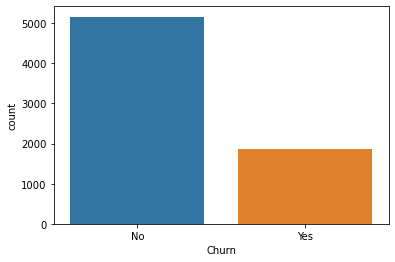

In [102]:
sns.countplot(data=data_df, x='Churn');


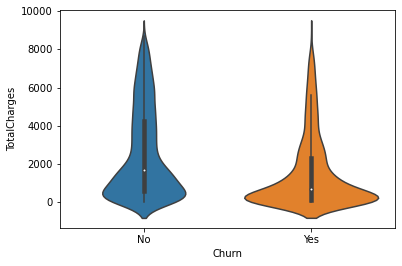

In [104]:
sns.violinplot(data=data_df, x='Churn', y='TotalCharges');


In [105]:
We will explore 4 different tree based methods: 
    A Single Decision Tree,
    Random Forest,
    AdaBoost, 
    Gradient Boosting

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [106]:
numerics_columns.columns


Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

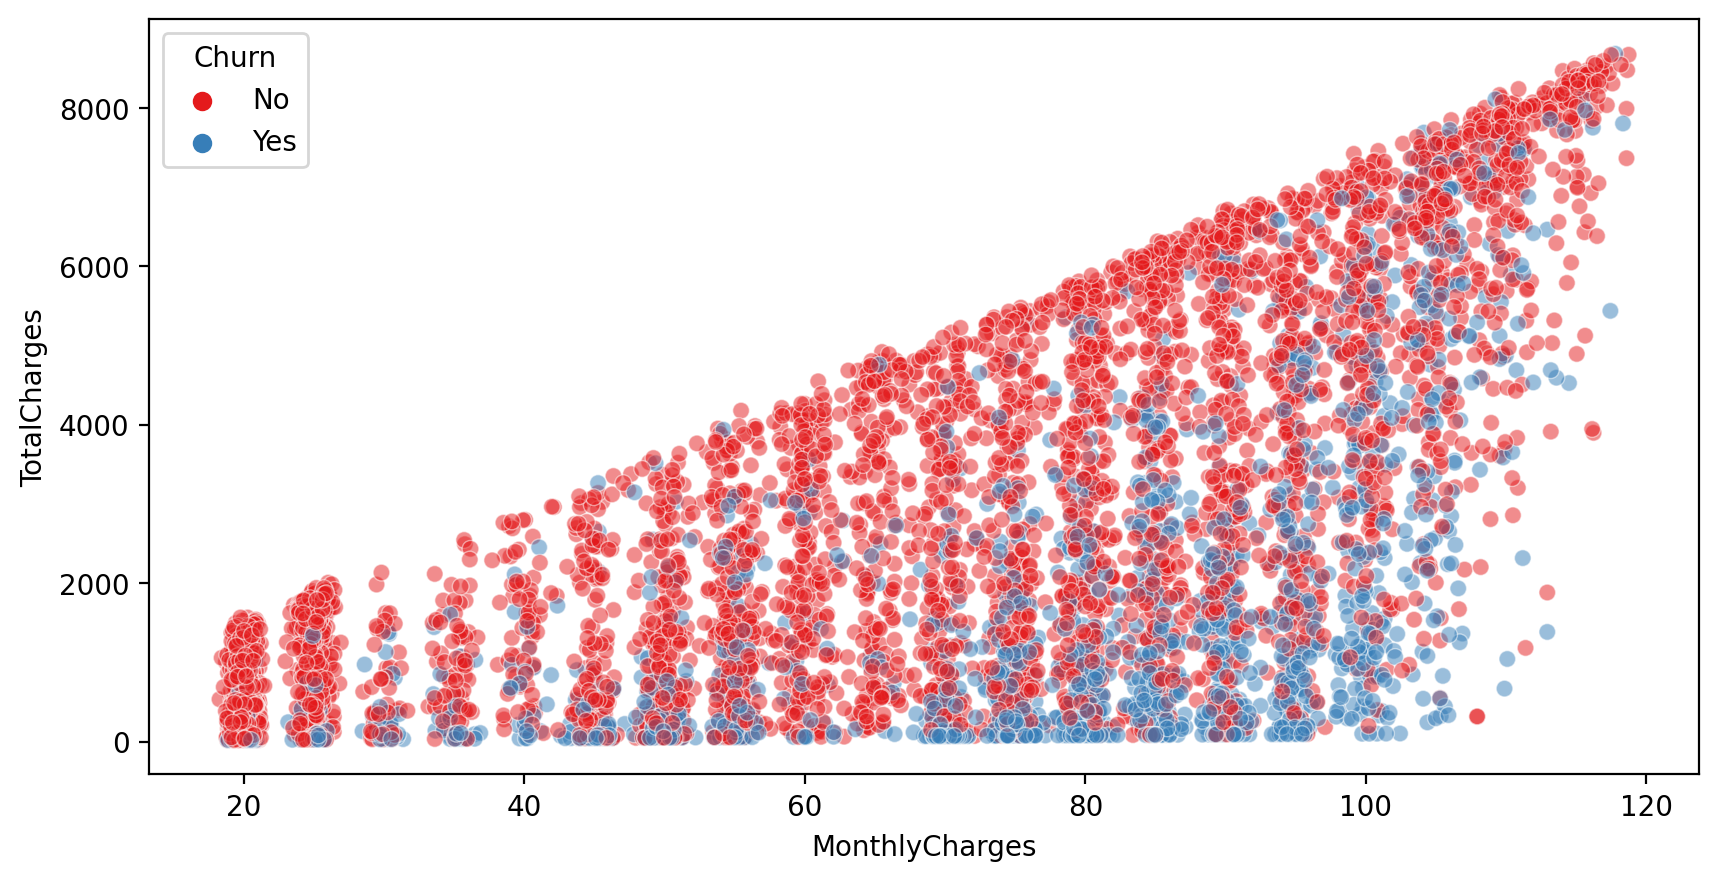

In [110]:
plt.figure(figsize=(10, 5), dpi=200)
sns.scatterplot(data=data_df, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette='Set1', alpha=0.5, linewidth=0.5);

In [111]:

unique_tenures = sorted(data_df['tenure'].unique())
unique_tenures[:5], unique_tenures[-5:]

([1, 2, 3, 4, 5], [68, 69, 70, 71, 72])

In [112]:
no_churn = data_df.groupby(['Churn', 'tenure']).count().transpose()['No']
yes_churn = data_df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

In [113]:
churn_rate = 100 * yes_churn / (no_churn + yes_churn)


In [114]:
churn_rate.transpose()['customerID']


tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

In [115]:

total_churns_by_tenure = data_df[data_df['Churn'] == 'Yes'].groupby('tenure').count()['customerID']
total_churns_by_tenure.head()

tenure
1    380
2    123
3     94
4     83
5     64
Name: customerID, dtype: int64

In [116]:

total_customers_by_tenure = data_df.groupby('tenure').count()['customerID']
total_customers_by_tenure

tenure
1     613
2     238
3     200
4     176
5     133
     ... 
68    100
69     95
70    119
71    170
72    362
Name: customerID, Length: 72, dtype: int64

In [117]:
churn_rates_by_tenure = 100* total_churns_by_tenure / total_customers_by_tenure


In [118]:
churn_rates_by_tenure


tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

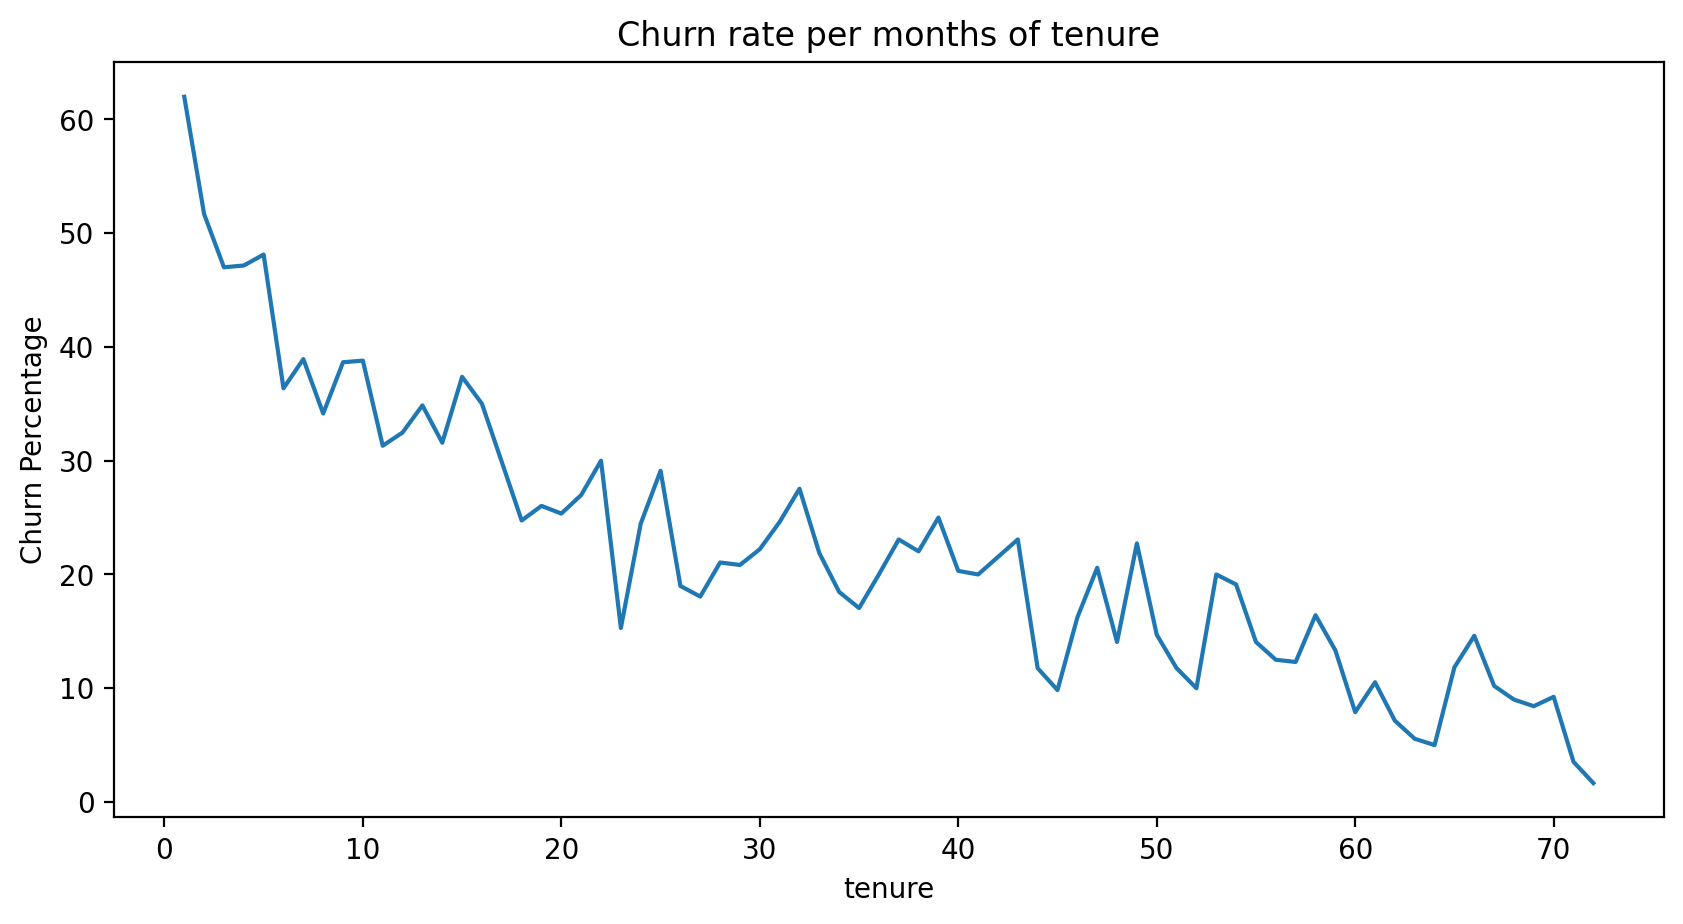

In [119]:

plt.figure(figsize=(10, 5), dpi=200)
churn_rates_by_tenure.plot();
plt.ylabel('Churn Percentage')
plt.title('Churn rate per months of tenure');

In [120]:
def cohort_group(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    return "Over 48 Months"

In [121]:
data_df['Tenure Cohort'] = data_df['tenure'].apply(cohort_group)


In [122]:
data_df[['tenure','Tenure Cohort']].head()


,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months


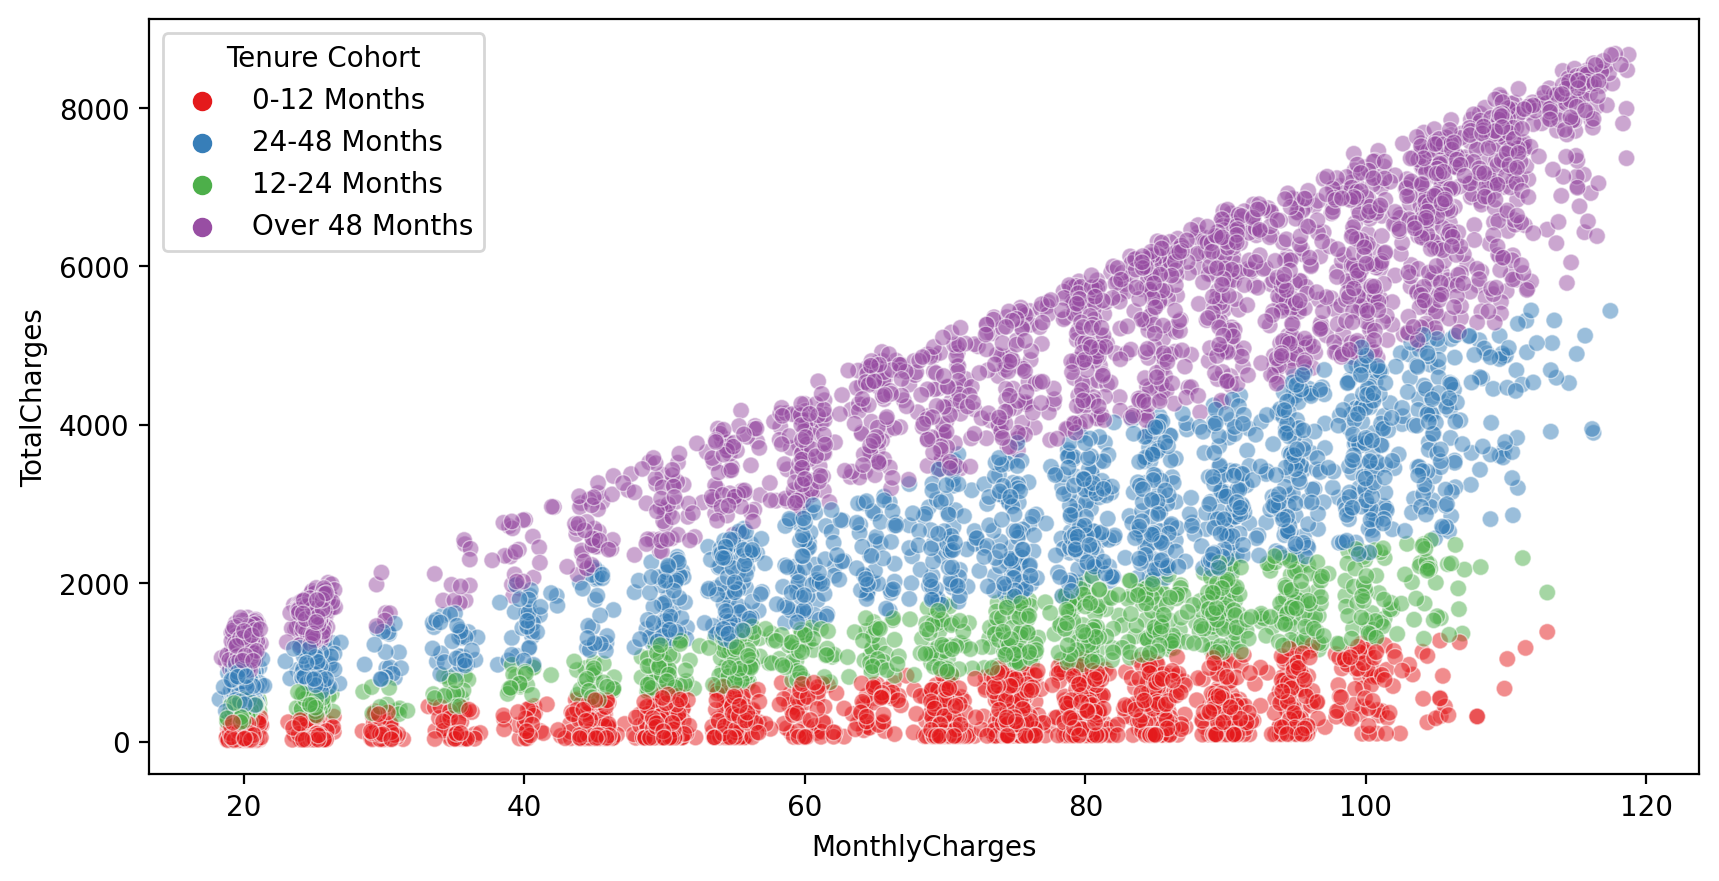

In [124]:
plt.figure(figsize=(10, 5), dpi=200)
sns.scatterplot(data=data_df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', linewidth=0.5, alpha=0.5, palette='Set1');

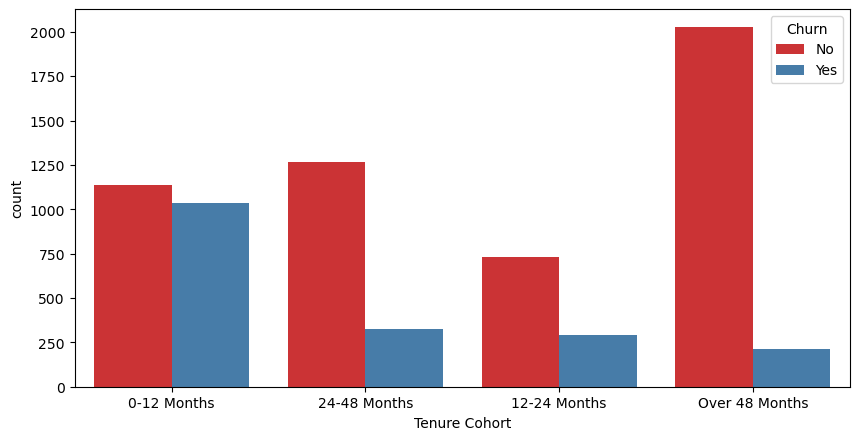

In [126]:
plt.figure(figsize=(10, 5), dpi=100)
sns.countplot(data=data_df, x='Tenure Cohort', hue='Churn', palette='Set1');

In [127]:
data_df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure Cohort'],
      dtype='object')

In [129]:

X = data_df.drop(['customerID', 'Churn'], axis=1)
X = pd.get_dummies(X, drop_first=True)

In [130]:
y = data_df['Churn']


In [131]:
from sklearn.model_selection import train_test_split


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=101)

In [133]:
X_train.shape, X_test.shape, X_val.shape


((5625, 33), (703, 33), (704, 33))

In [135]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [136]:
paramaters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(5,50,1),
    'max_features': ['auto', 'sqrt', 'log2'],   
}

dt_grid = GridSearchCV(DecisionTreeClassifier(), paramaters, cv=5)

In [137]:
dt_grid = GridSearchCV(DecisionTreeClassifier(), paramaters, cv=5).fit(X_train, y_train)


In [138]:
dt_grid.best_params_


{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}

In [139]:
dt_grid.best_estimator_


DecisionTreeClassifier(max_depth=7, max_features='auto')

In [140]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [141]:
dt_predictions = dt_grid.predict(X_test)


In [142]:
print(classification_report(y_test, dt_predictions))


              precision    recall  f1-score   support

          No       0.85      0.89      0.87       535
         Yes       0.58      0.48      0.53       168

    accuracy                           0.79       703
   macro avg       0.71      0.69      0.70       703
weighted avg       0.78      0.79      0.79       703



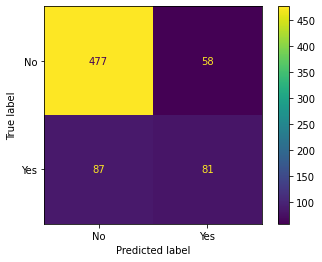

In [145]:
plot_confusion_matrix(dt_grid, X_test, y_test);
#For FP (42 customers who are going to chun as per model predictions), we might to want to give them Promotion, discount etc to attract them to stay longer with the service.
#Theare are total 149 misclassifications with FN (102 customers who are going to chun, model predicated as No Chun).

In [146]:
dt_grid.best_estimator_.feature_importances_


array([6.43342450e-03, 1.34397447e-01, 1.78476032e-01, 1.67958004e-01,
       8.56119816e-05, 5.14915315e-03, 4.54050731e-02, 0.00000000e+00,
       0.00000000e+00, 3.06088978e-03, 1.63027791e-02, 0.00000000e+00,
       5.18194242e-02, 1.01421830e-01, 0.00000000e+00, 7.41297667e-02,
       0.00000000e+00, 1.12520713e-03, 0.00000000e+00, 1.19715948e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.96553596e-03,
       1.98061564e-02, 2.24088097e-02, 9.39676028e-03, 1.39480881e-03,
       5.01052988e-02, 9.05599879e-04, 2.93419116e-03, 1.72205613e-02,
       7.31260415e-02])

In [147]:
imp_features = pd.DataFrame(data=dt_grid.best_estimator_.feature_importances_, 
                                               index=X.columns,
                                               columns=['Feature Imporance'])


In [148]:
imp_features.sort_values('Feature Imporance', ascending=False)


,Feature Imporance
MonthlyCharges,0.178476
TotalCharges,0.167958
tenure,0.134397
OnlineSecurity_Yes,0.101422
OnlineBackup_Yes,0.074130
Tenure Cohort_Over 48 Months,0.073126
OnlineSecurity_No internet service,0.051819
PaymentMethod_Electronic check,0.050105
Dependents_Yes,0.045405
Contract_Two year,0.022409


In [149]:
#As there are a lot of features with feature impotrances of 0, we will filter them out.

imp_features = imp_features[imp_features['Feature Imporance']  > 0].sort_values('Feature Imporance')

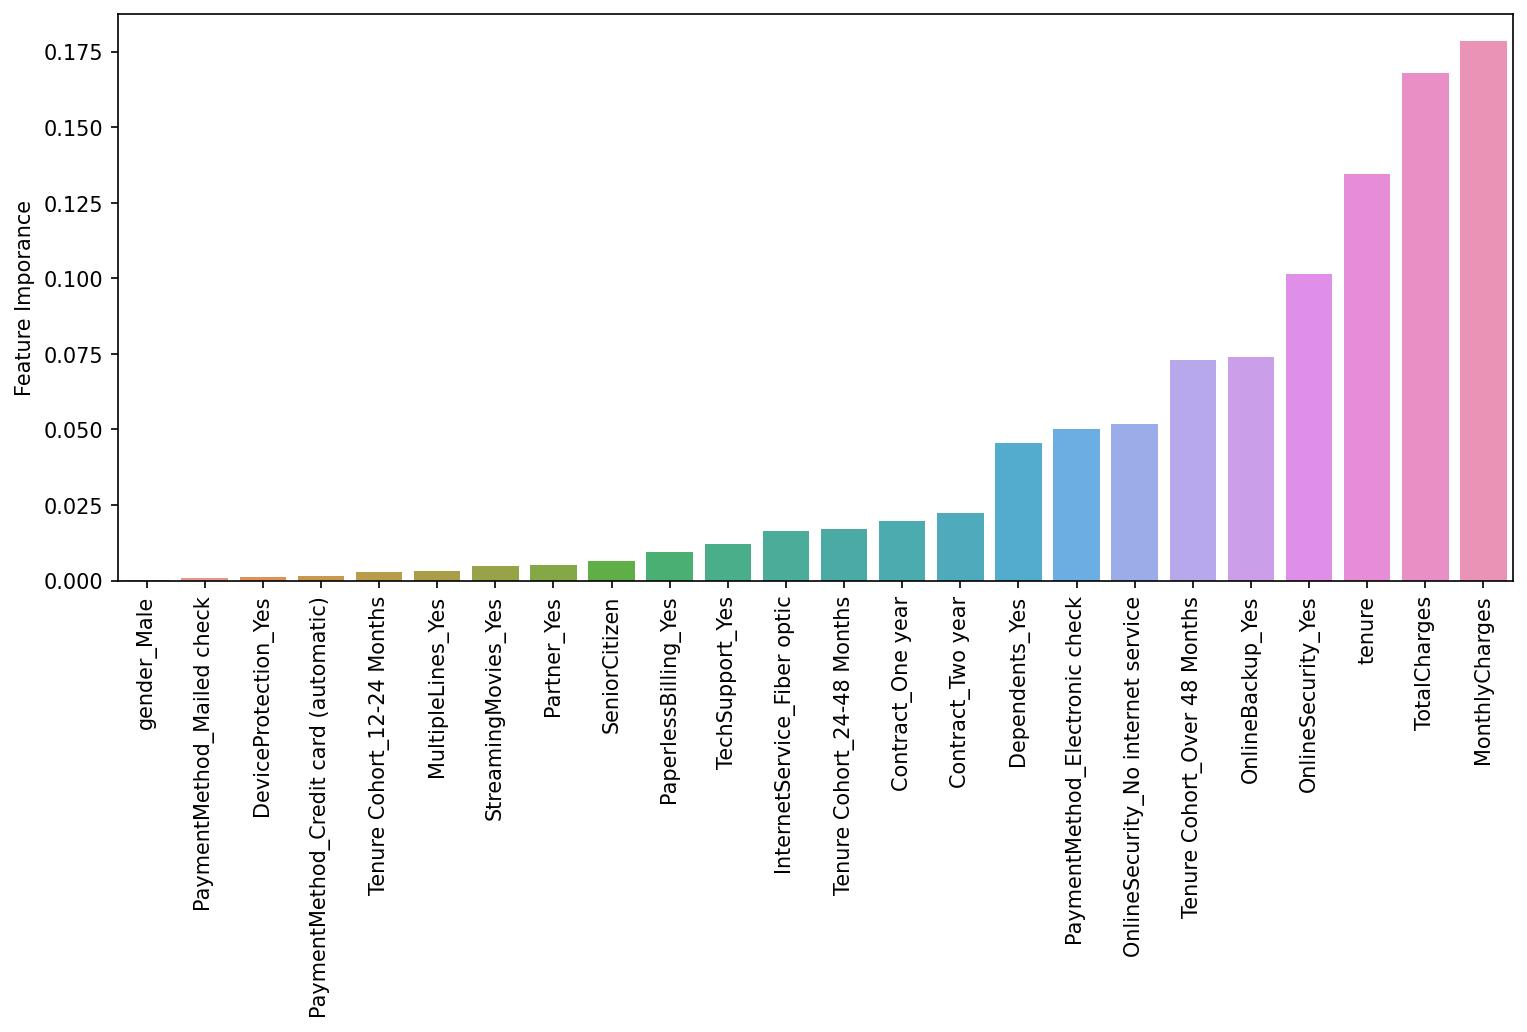

In [150]:
plt.figure(figsize=(12, 5), dpi=150)
sns.barplot(data=imp_features, x=imp_features.index, y='Feature Imporance');
plt.xticks(rotation=90); 

In [151]:
from sklearn.tree import plot_tree


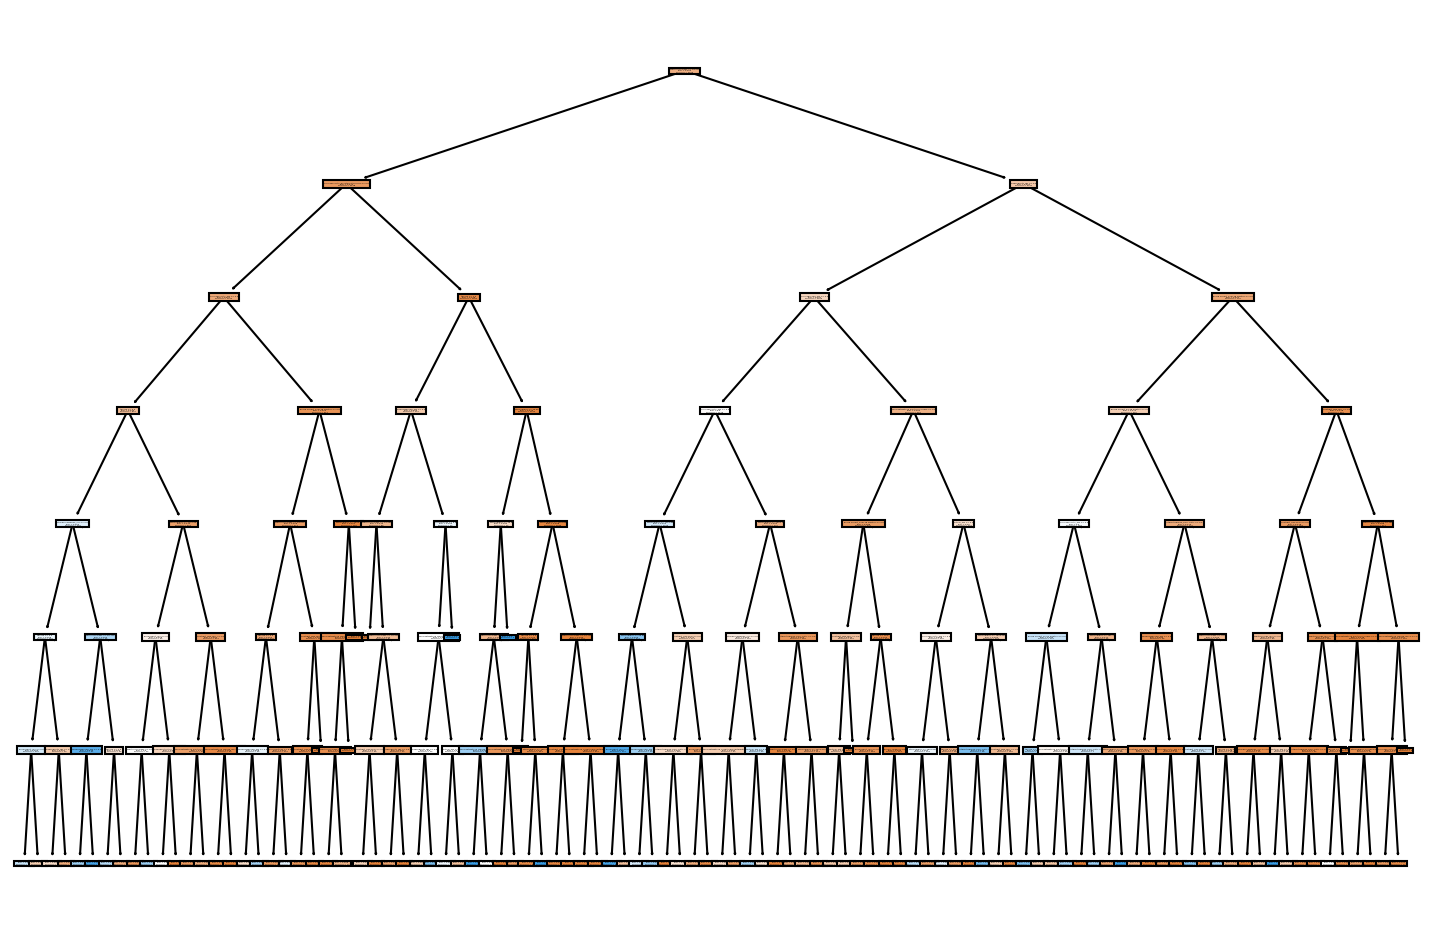

In [152]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt_grid.best_estimator_, filled=True, feature_names=X.columns);

In [153]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier


In [154]:
parameters = {
    'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200, 300],
    'max_features': ["auto", "sqrt", "log2"],
}

rf_grid = GridSearchCV(RandomForestClassifier(), parameters, cv=5, verbose=2, n_jobs=-1)

In [155]:
rf_grid.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200,
                                          300]},
             verbose=2)

In [156]:
rf_grid.best_estimator_


RandomForestClassifier(max_features='sqrt', n_estimators=300)

In [157]:
rf_grid.best_params_


{'max_features': 'sqrt', 'n_estimators': 300}

In [158]:
rf_predictions = rf_grid.predict(X_test)


In [159]:
print(classification_report(y_test, rf_predictions))


              precision    recall  f1-score   support

          No       0.84      0.90      0.87       535
         Yes       0.58      0.44      0.50       168

    accuracy                           0.79       703
   macro avg       0.71      0.67      0.68       703
weighted avg       0.78      0.79      0.78       703



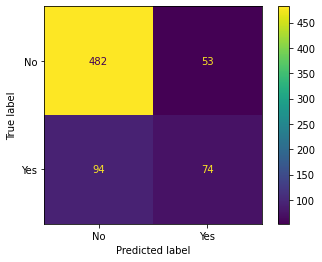

In [160]:
plot_confusion_matrix(rf_grid, X_test, y_test);


In [161]:
#Although accuracy is not improving compared to Decision Tree,

#Recall, F1-Score in overall get a little more balanced.
#FN gets lower from 486 to 424.

In [167]:
#Boosted Trees with Ada Boost and Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier



In [168]:
#Ada Boost
ada_model = AdaBoostClassifier()


In [169]:
gb_model = GradientBoostingClassifier()


In [170]:
parameters = {
    'n_estimators': np.arange(50, 300, 20),
}

ada_grid = GridSearchCV(ada_model, parameters, cv=5)
ada_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': array([ 50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290])})

In [171]:
ada_predictions = ada_grid.predict(X_test)

print(classification_report(y_test, ada_predictions))

              precision    recall  f1-score   support

          No       0.86      0.90      0.88       535
         Yes       0.62      0.52      0.56       168

    accuracy                           0.81       703
   macro avg       0.74      0.71      0.72       703
weighted avg       0.80      0.81      0.80       703



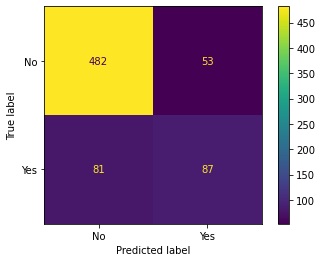

In [172]:
plot_confusion_matrix(ada_grid, X_test, y_test);


In [173]:
#Gradient Boost
gb_grid = GridSearchCV(gb_model, parameters, cv=5)
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': array([ 50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290])})

In [174]:
gb_predictions = gb_grid.predict(X_test)

print(classification_report(y_test, gb_predictions))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88       535
         Yes       0.63      0.49      0.55       168

    accuracy                           0.81       703
   macro avg       0.74      0.70      0.71       703
weighted avg       0.80      0.81      0.80       703



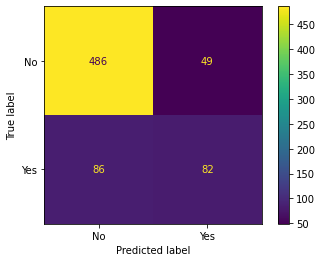

In [175]:
plot_confusion_matrix(gb_grid, X_test, y_test);

In [ ]:
#KNN